<a href="https://colab.research.google.com/github/KarinaKatke/HiRiD/blob/main/getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import math
import numpy as np
import os
import pandas as pd
import re
import shutil
import sys
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/HiRID/raw_stage'

In [4]:
# Extract Raw Data
import tarfile

file_path = '/content/drive/My Drive/HiRID/raw_stage/observation_tables_parquet.tar.gz'
extract_path = '/content/observation_tables'

with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

In [5]:
extracted_files = os.listdir(extract_path)
print(extracted_files)

['observation_tables']


In [6]:
observation_table_path = os.path.join(extract_path, 'observation_tables')

In [7]:
# Listing of all parquet files
all_parquet_files = []
for root, dirs, files in os.walk(observation_table_path):
    for file in files:
        if file.endswith('.parquet'):
            all_parquet_files.append(os.path.join(root, file))

print(all_parquet_files)

['/content/observation_tables/observation_tables/parquet/part-63.parquet', '/content/observation_tables/observation_tables/parquet/part-127.parquet', '/content/observation_tables/observation_tables/parquet/part-52.parquet', '/content/observation_tables/observation_tables/parquet/part-54.parquet', '/content/observation_tables/observation_tables/parquet/part-104.parquet', '/content/observation_tables/observation_tables/parquet/part-177.parquet', '/content/observation_tables/observation_tables/parquet/part-84.parquet', '/content/observation_tables/observation_tables/parquet/part-159.parquet', '/content/observation_tables/observation_tables/parquet/part-161.parquet', '/content/observation_tables/observation_tables/parquet/part-47.parquet', '/content/observation_tables/observation_tables/parquet/part-11.parquet', '/content/observation_tables/observation_tables/parquet/part-184.parquet', '/content/observation_tables/observation_tables/parquet/part-44.parquet', '/content/observation_tables/ob

In [8]:
#for parquet_file in all_parquet_files:
 #   df = pd.read_parquet(parquet_file)
  #  print(f"Reading file: {parquet_file}")
   # print(df.columns)

## Reading using Pandas
Required python packages are `pandas` and `pyarrow`

### Reading a part

In [10]:
part = 7

In [11]:
# Pandas-Optionen setzen für bessere Anzeige
pd.set_option("display.max_columns", None)        # alle Spalten anzeigen
pd.set_option("display.expand_frame_repr", False) # keine Umbrüche


In [12]:
file_path = os.path.join(
    'observation_tables', 'observation_tables', 'parquet', f'part-{part}.parquet'
)

In [13]:
# Anzeigen der Spaltennmane des parquet-files

df_part = pd.read_parquet(file_path)
print(f"Datei geladen: {file_path}")
print(df_part.columns)


Datei geladen: observation_tables/observation_tables/parquet/part-7.parquet
Index(['datetime', 'entertime', 'patientid', 'status', 'stringvalue', 'type',
       'value', 'variableid'],
      dtype='object')


In [14]:
df_part['value'].count() #zählt wie viele Werte in der Spalte 'value' nicht leer sind, also wie viele Werte existieren

np.int64(2191088)

In [15]:
# die ersten 10 Zeilen anzeigen lassen des parquet files

print(df_part.head(10))

                 datetime               entertime  patientid  status stringvalue type  value  variableid
0 2176-11-05 12:00:00.000 2176-11-05 13:02:46.590         94       8                     0.0    30005080
1 2176-11-05 12:00:00.000 2176-11-05 15:07:09.450         94       8                     0.0    30005110
2 2176-11-05 12:00:00.000 2176-11-05 13:02:46.440         94       8                     0.0    30005010
3 2176-11-05 12:00:00.000 2176-11-05 13:02:46.560         94       8                     0.0    30005075
4 2176-11-05 12:05:00.000 2176-11-05 12:06:42.790         94       8        None       175.0    10000450
5 2176-11-05 12:05:00.000 2176-11-05 12:06:42.790         94       8        None        75.0    10000400
6 2176-11-05 12:06:41.310 2176-11-05 12:06:43.586         94       4                   100.0        4000
7 2176-11-05 12:07:32.130 2176-11-05 12:07:34.853         94       4                   100.0         200
8 2176-11-05 12:07:33.600 2176-11-05 12:08:14.183      

In [16]:
df_part.info()
df_part.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191218 entries, 0 to 2191217
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   entertime    datetime64[ns]
 2   patientid    int32         
 3   status       int16         
 4   stringvalue  object        
 5   type         object        
 6   value        float32       
 7   variableid   int32         
dtypes: datetime64[ns](2), float32(1), int16(1), int32(2), object(2)
memory usage: 96.1+ MB


,0
datetime,0
entertime,0
patientid,0
status,0
stringvalue,37454
type,0
value,130
variableid,0


In [17]:
df_part.describe()


,datetime,entertime,patientid,status,value,variableid
count,2191218,2191218,2.191218e+06,2.191218e+06,2.191088e+06,2.191218e+06
mean,2149-09-03 20:32:48.524234752,2149-09-03 20:41:38.350764032,1.640962e+04,1.322869e+01,1.537623e+02,3.604501e+06
min,2103-02-21 18:40:00,2103-02-21 18:44:18.906000,9.400000e+01,-1.200000e+02,-3.153600e+02,1.000000e+02
25%,2135-01-06 06:59:58.599999488,2135-01-06 07:02:50.490000384,9.731000e+03,8.000000e+00,9.500000e+00,2.000000e+02
50%,2151-08-02 03:54:03.950000128,2151-08-02 03:55:19.253000192,1.675000e+04,1.600000e+01,5.020000e+01,5.100000e+02
75%,2161-08-03 06:00:00,2161-08-03 06:06:55.116000256,2.367800e+04,1.600000e+01,9.700000e+01,4.000000e+03
max,2194-04-17 12:00:16.920000,2194-04-17 12:00:16.920000,3.348800e+04,7.200000e+01,4.560600e+04,3.001001e+07
std,NaN,NaN,8.959669e+03,3.835985e+00,5.221786e+02,9.554818e+06


# Betrachtete Value


In [ ]:
# Die gewünschte variableid setzen
variableid = 300


# Wie viele Einträge hat eine bestimmte Variable?

In [59]:
total_count = 0
variableid = 10000400

In [60]:
# zählen wie viel data wir zu einer spezifischen value haben, in diesem parquet file

gefilterte_values = df_part[df_part['variableid'] == variableid]['value']
total_count = gefilterte_values.notna().sum()

print(f"\nGesamtanzahl nicht-NaN-Werte für VariableID {variableid}: {total_count}")
print(gefilterte_values)


Gesamtanzahl nicht-NaN-Werte für VariableID 10000400: 130
5           75.0
3490        80.0
7261       100.0
11246       70.0
69150      110.0
           ...  
2095148     70.0
2159773     85.0
2165460     70.0
2181055     70.0
2185642     65.0
Name: value, Length: 130, dtype: float32


In [20]:
# Zähler initialisieren
gesamt_count = 0

# Durchlaufen aller Parquet-Dateien
for file_path in all_parquet_files:
    print(f"Lade Datei: {file_path}")
    df = pd.read_parquet(file_path)

    print(df.describe())

print(f"\fertighihi")

Lade Datei: /content/observation_tables/observation_tables/parquet/part-63.parquet
                            datetime                      entertime     patientid        status         value    variableid
count                        3737430                        3737430  3.737430e+06  3.737430e+06  3.737248e+06  3.737430e+06
mean   2150-07-21 04:12:57.937551360  2150-07-21 04:21:50.923945984  1.511496e+04  1.360482e+01  1.429050e+02  3.562359e+06
min              2107-10-01 01:10:00     2107-10-01 01:13:24.633000  5.100000e+01 -1.200000e+02 -3.193600e+02  1.000000e+02
25%    2121-04-14 23:42:07.749999616  2121-04-14 23:46:45.768999936  6.456000e+03  8.000000e+00  9.000000e+00  2.000000e+02
50%    2153-12-13 03:20:09.299999744  2153-12-13 03:23:42.611000320  1.575600e+04  1.600000e+01  4.500000e+01  5.100000e+02
75%    2175-07-01 00:23:40.780000256  2175-07-01 00:24:46.312000512  2.149600e+04  1.600000e+01  9.500000e+01  3.845000e+03
max       2197-08-06 21:31:52.920000     2197-08-

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1025: RuntimeWarning: overflow encountered in cast
  result = result.astype(dtype, copy=False)


                            datetime                      entertime     patientid        status         value    variableid
count                        4557893                        4557893  4.557893e+06  4.557893e+06  4.557625e+06  4.557893e+06
mean   2154-01-19 06:41:25.166670848  2154-01-19 06:49:17.124101120  1.759630e+04  1.340588e+01  7.285403e+27  3.509347e+06
min              2104-09-23 14:40:00     2104-09-23 14:45:50.136000  4.350000e+02 -1.200000e+02 -3.193600e+02  1.000000e+02
25%    2129-02-18 05:15:39.930000384  2129-02-18 05:18:26.286000128  9.274000e+03  8.000000e+00  1.000000e+01  2.000000e+02
50%    2157-07-13 16:09:04.060000256  2157-07-13 16:21:30.860000256  1.580100e+04  1.600000e+01  4.050000e+01  7.000000e+02
75%    2182-02-12 08:36:17.870000128  2182-02-12 08:43:07.276000256  2.595000e+04  1.600000e+01  9.700000e+01  4.000000e+03
max       2195-07-01 11:47:17.980000     2195-07-01 11:48:31.640000  3.356300e+04  1.360000e+02  9.223372e+31  3.001001e+07
std     

KeyboardInterrupt: 

In [61]:
# durch alle Parquet Files gehen und zählen:

# Zähler initialisieren
gesamt_count = 0

# Durchlaufen aller Parquet-Dateien
for file_path in all_parquet_files:
    print(f"Lade Datei: {file_path}")
    df = pd.read_parquet(file_path)

    # Filtern nach der gewünschten variableid
    gefilterte_values = df[df['variableid'] == variableid]['value']

    # Zählen nicht-NaN-Werte in der Spalte "value"
    count = gefilterte_values.notna().sum()
    gesamt_count += count

    print(f"{count} Werte in Datei gefunden.")

print(f"\n Gesamtanzahl nicht-NaN-Werte für VariableID {variableid}: {gesamt_count}")

Lade Datei: /content/observation_tables/observation_tables/parquet/part-63.parquet
166 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-127.parquet
125 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-52.parquet
168 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-54.parquet
135 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-104.parquet
156 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-177.parquet
114 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-84.parquet
157 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-159.parquet
123 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-161.parquet
131 Werte in Dat

KeyboardInterrupt: 

# Tabelle nur mit einer variableid

In [21]:
variableid = 10000400

In [62]:
# Filter anwenden
filtered_df = df_part[df_part["variableid"] == variableid]

# Nach Zeit sortieren, falls vorhanden
if "timestamp" in filtered_df.columns:
    filtered_df = filtered_df.sort_values("timestamp")

# Ausgabe
print(filtered_df.head(20))

                  datetime               entertime  patientid  status stringvalue type  value  variableid
5      2176-11-05 12:05:00 2176-11-05 12:06:42.790         94       8        None        75.0    10000400
3490   2144-03-06 16:30:00 2144-03-06 16:35:15.996        228       8        None        80.0    10000400
7261   2191-11-28 13:50:00 2191-11-28 14:01:53.016        478       8        None       100.0    10000400
11246  2140-05-20 01:25:00 2140-05-20 01:26:49.146        997       8        None        70.0    10000400
69150  2131-12-07 13:48:00 2131-12-07 13:51:09.786       1005       8        None       110.0    10000400
85823  2176-06-24 21:25:00 2176-06-24 21:33:44.623       1394       8        None        95.0    10000400
120447 2185-03-27 21:35:00 2185-03-27 21:37:16.240       2506       8        None        80.0    10000400
124211 2147-05-31 18:15:00 2147-05-31 18:47:22.850       2756       8        None        70.0    10000400
181584 2155-12-23 09:10:00 2155-12-23 09:13:20

# Statistical Analysis

Histogramm der Verteilung von Tidalvolumen

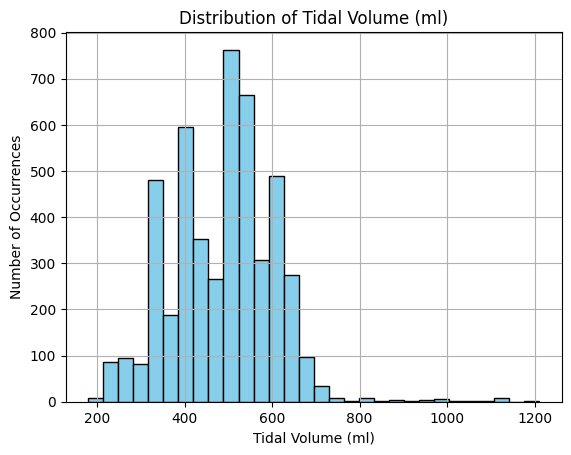

In [43]:
import matplotlib.pyplot as plt

# Beispiel: nur Tidalvolumen extrahieren
tv_data = df[df['variableid'] == 2400].copy()
tv_data = tv_data.dropna(subset=['value'])
weight_data = df[df['variableid'] == 10000480].copy()
weight_data = weight_data.dropna(subset=['value'])

plt.hist(tv_data['value'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tidal Volume (ml)")
plt.xlabel("Tidal Volume (ml)")
plt.ylabel("Number of Occurrences")
plt.grid(True)
plt.show()


Mit abhängigkei von Gewicht:


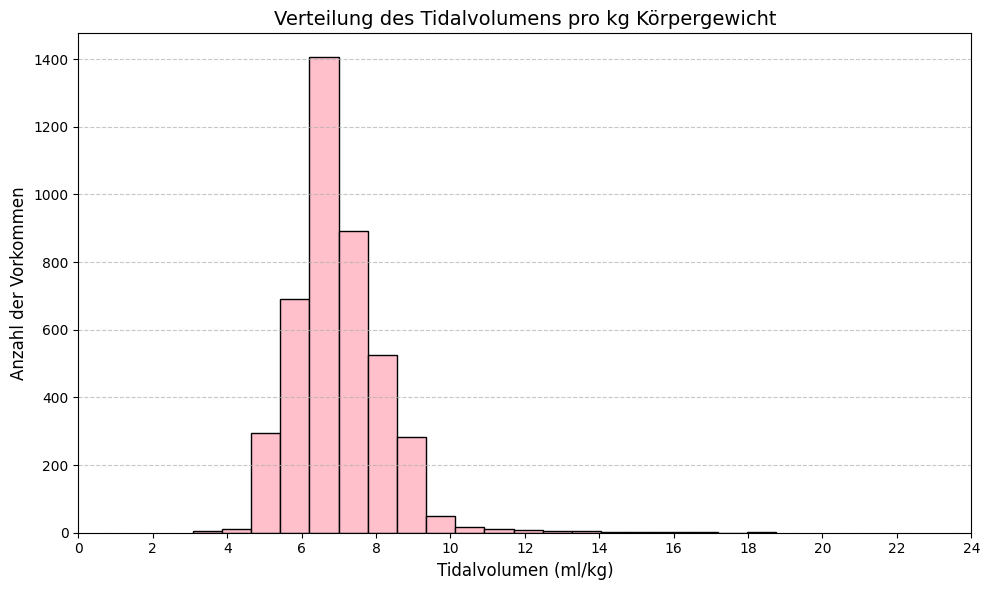

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Tidalvolumen filtern
tv_data = df[df["variableid"] == 2400].copy()
tv_data = tv_data.dropna(subset=["value"])
tv_data = tv_data.rename(columns={"value": "tv_ml"})

# 2. Gewicht filtern
weight_data = df[df["variableid"] == 10000400].copy()
weight_data = weight_data.dropna(subset=["value"])
weight_data = weight_data.rename(columns={"value": "weight_kg"})

# 3. Nur den jeweils ersten Gewichtseintrag je Patient behalten (Annahme: stabiler Wert)
first_weights = weight_data.sort_values("datetime").groupby("patientid").first().reset_index()

# 4. Tidalvolumen mit Gewicht mergen über patientid
merged = pd.merge(tv_data, first_weights[["patientid", "weight_kg"]], on="patientid", how="inner")

# 5. ml/kg berechnen
merged["tv_per_kg"] = merged["tv_ml"] / merged["weight_kg"]

# 6. Werte filtern (optional – um Ausreißer zu vermeiden)
merged = merged[(merged["tv_per_kg"] > 2) & (merged["tv_per_kg"] < 20)]  # realistische Spanne

# 7. Histogramm plotten
plt.figure(figsize=(10, 6))
plt.hist(merged["tv_per_kg"], bins=20, color='pink', edgecolor='black')
plt.title("Verteilung des Tidalvolumens pro kg Körpergewicht", fontsize=14)
plt.xlabel("Tidalvolumen (ml/kg)", fontsize=12)
plt.ylabel("Anzahl der Vorkommen", fontsize=12)
plt.xticks(range(0, 25, 2))  # z. B. 0, 2, 4, ..., 24
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dynamik: Anzahl der Änderungen

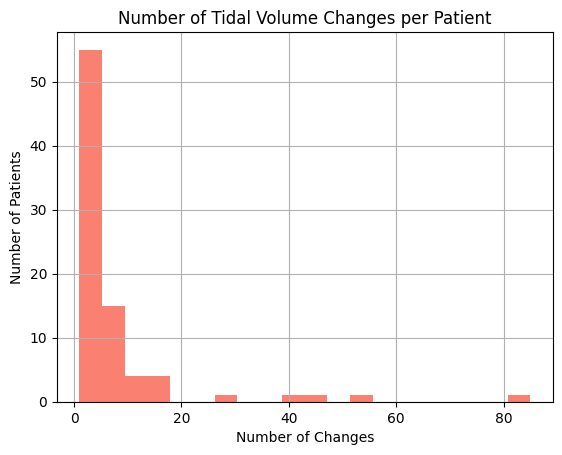

In [30]:
# Beispiel: Anzahl Tidalvolumen-Wechsel pro Patient
tv_data = tv_data.sort_values(by=["patientid", "datetime"])
tv_data['tv_shifted'] = tv_data.groupby('patientid')['value'].shift(1)
tv_data['changed'] = tv_data['value'] != tv_data['tv_shifted']

# Nur Zeilen zählen, bei denen sich der Wert ändert
change_counts = tv_data.groupby('patientid')['changed'].sum()
plt.hist(change_counts, bins=20, color='salmon')
plt.title("Number of Tidal Volume Changes per Patient")
plt.xlabel("Number of Changes")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


Variabilität des Setting pro Patient:

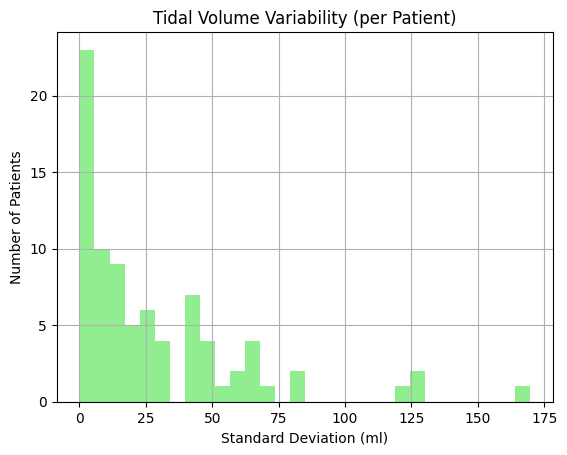

In [25]:
variability = tv_data.groupby('patientid')['value'].std()
plt.hist(variability.dropna(), bins=30, color='lightgreen')
plt.title("Tidal Volume Variability (per Patient)")
plt.xlabel("Standard Deviation (ml)")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


ventilator mode (kategorisch) analysiren:

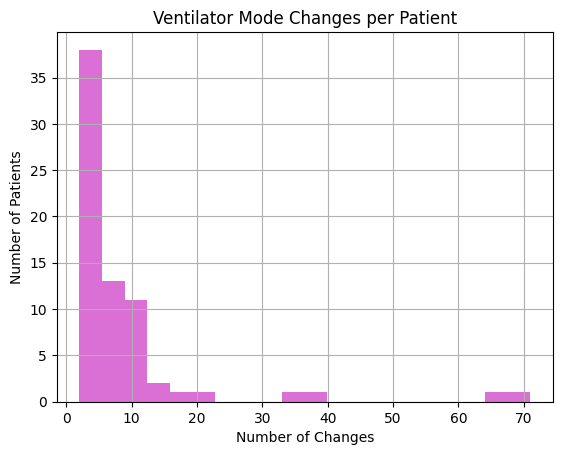

In [28]:
vent_data = df[df['variableid'] == 3845].copy()
vent_data = vent_data.sort_values(by=["patientid", "datetime"])
vent_data['mode_shifted'] = vent_data.groupby('patientid')['value'].shift(1)
vent_data['changed'] = vent_data['value'] != vent_data['mode_shifted']

mode_change_counts = vent_data.groupby('patientid')['changed'].sum()
plt.hist(mode_change_counts, bins=20, color='orchid')
plt.title("Ventilator Mode Changes per Patient")
plt.xlabel("Number of Changes")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


# Preprocessing

# Label und Features